<a href="https://colab.research.google.com/github/uneiz1103/global-cancer-eda-inferential-analysis/blob/main/EDA_and_Inferential_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

data_path = os.path.join(path, 'global_cancer_patients_2015_2024.csv')
data = pd.read_csv(data_path)

print(data.head())

  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.9

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:
data.duplicated().sum()

np.int64(0)

# Descriptive analysis

#Age

In [ ]:
data['Age']

,Age
0,71
1,34
2,80
3,40
4,43
...,...
49995,80
49996,40
49997,74
49998,21


In [ ]:
data.shape

(50000, 15)

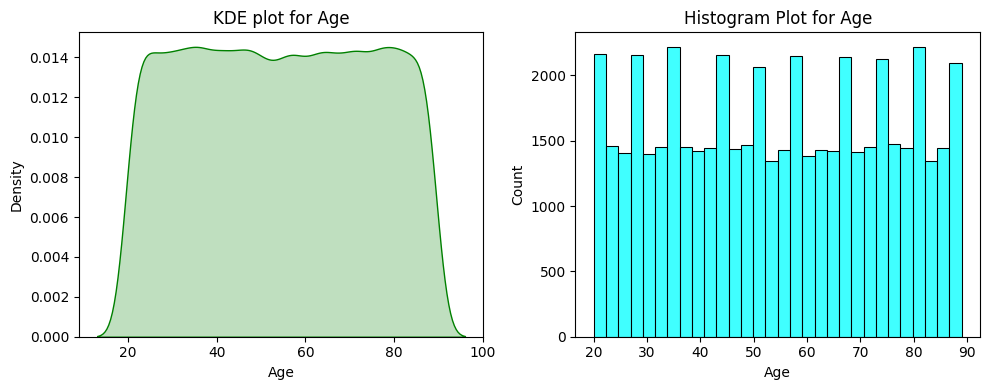

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data['Age'], fill = True, color='green')
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data['Age'], bins = 30, kde=False, color= "cyan")
plt.title("Histogram Plot for Age")

plt.tight_layout()
plt.show()

In [ ]:
data['Age'].describe()

,Age
count,50000.000000
mean,54.421540
std,20.224451
min,20.000000
25%,37.000000
50%,54.000000
75%,72.000000
max,89.000000


#Gender


In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,16796
Female,16709
Other,16495


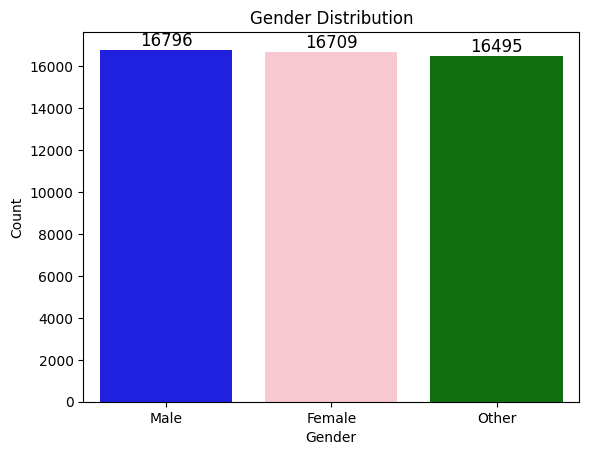

In [ ]:
sns.barplot(x = data['Gender'].value_counts().index,
            y = data['Gender'].value_counts().values,
            palette = ['blue', 'pink', 'green']
            )

for i, v in enumerate(data['Gender'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#Countries

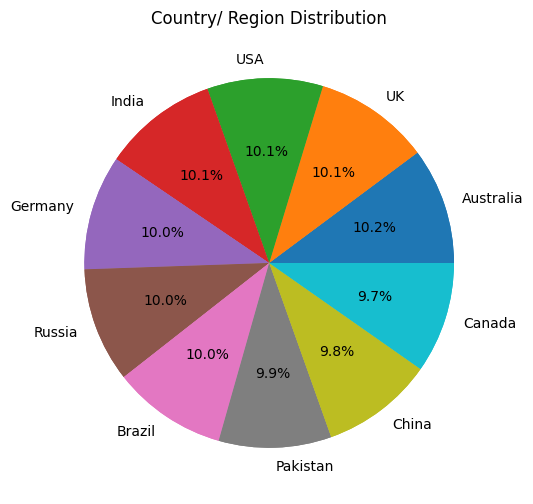

In [ ]:
country_counts = data['Country_Region'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(x=country_counts.values,
        labels= country_counts.index,
        autopct= '%1.1f%%')

plt.pie(x=country_counts.values)

plt.title("Country/ Region Distribution")
plt.show()

Patients comes from 10 different countries/regions, with Australia being the most represented (5,092 patients). Number of data points for each country is almost same.

This diversity enables cross-country comparison of cancer outcomes and treatment economic.


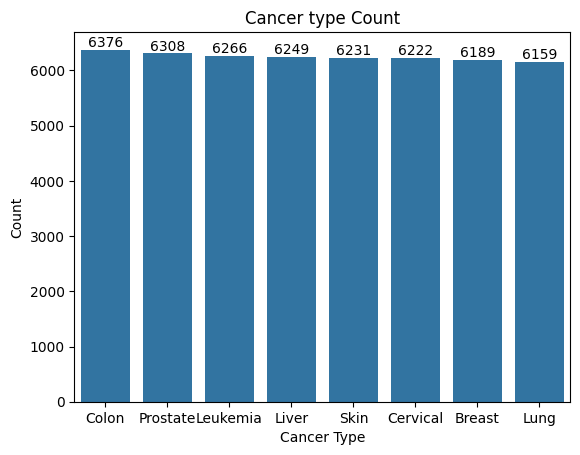

In [ ]:
# Cancer Type
data['Cancer_Type'].value_counts()

sns.barplot(x = data['Cancer_Type'].value_counts().index,
            y = data['Cancer_Type'].value_counts().values,
            )

for i, v in enumerate(data['Cancer_Type'].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.title("Cancer type Count")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()

We have in total 8 types of cancer, with each cancer having approx. same number of data points under the label, most common cancers are colon cancer followed by prostate cancer.

# Cancer State

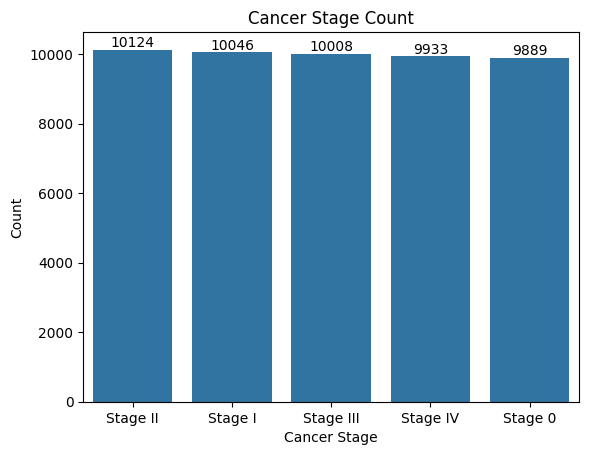

In [ ]:
# Cancer Type
data['Cancer_Stage'].value_counts()

sns.barplot(x = data['Cancer_Stage'].value_counts().index,
            y = data['Cancer_Stage'].value_counts().values,
            )

for i, v in enumerate(data['Cancer_Stage'].value_counts()):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.title("Cancer Stage Count")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()

Cancer Stage have 5 stages with values ranging from 0 to 4, with stage 2 the most common one, and each stage have same number of data.

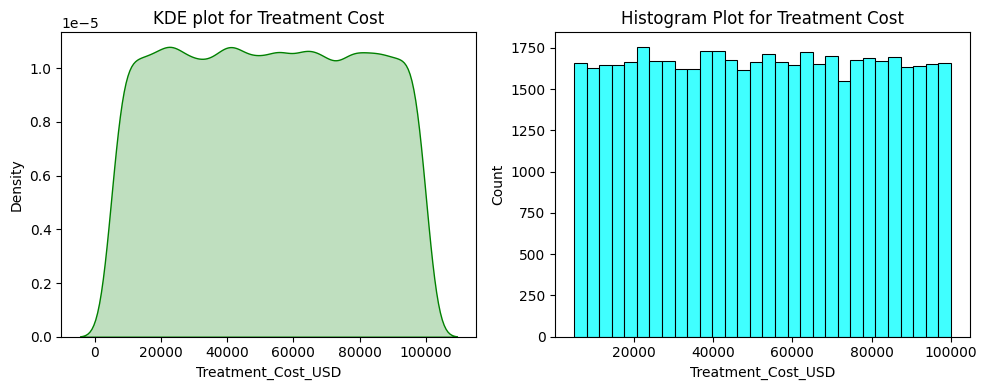

In [ ]:
# Plotting for treatment cost

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data['Treatment_Cost_USD'], fill = True, color='green')
plt.title("KDE plot for Treatment Cost")

plt.subplot(1,2,2)
sns.histplot(data['Treatment_Cost_USD'], bins = 30, kde=False, color= "cyan")
plt.title("Histogram Plot for Treatment Cost")

plt.tight_layout()
plt.show()

In [ ]:
data['Treatment_Cost_USD'].describe()

,Treatment_Cost_USD
count,50000.000000
mean,52467.298239
std,27363.229379
min,5000.050000
25%,28686.225000
50%,52474.310000
75%,76232.720000
max,99999.840000


Treatment Cost USD have no skewness, and there are almost same number of data points under each bin as observed by histogram  

# ANALYZING THE RISK FACTORS

In [ ]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [ ]:
columns_of_interest = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary = data[columns_of_interest].agg(["mean", "std", "min", "max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


These variables have nearly identical means and standard deviations, indicating they were likely designed on the same standardized scale. They are essential in studying interaction effects (e.g., genetic risk  x  Smoking) on survival.